<a href="https://colab.research.google.com/github/naekang/UOS-AI/blob/main/AI_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

import pandas as pd
torch.set_printoptions(edgeitems=2, precision=2, linewidth=75)

In [6]:
import csv
wine_path = './winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [7]:
df = pd.read_csv("./winequality-white.csv")
print(df)

     fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0      7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1     6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2     8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                

In [8]:
col_list = next(csv.reader(open(wine_path), delimiter=";"))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [9]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [10]:
data = wineq[:, :-1] 

data, data.shape

(tensor([[ 7.00,  0.27,  ...,  0.45,  8.80],
         [ 6.30,  0.30,  ...,  0.49,  9.50],
         ...,
         [ 5.50,  0.29,  ...,  0.38, 12.80],
         [ 6.00,  0.21,  ...,  0.32, 11.80]]), torch.Size([4898, 11]))

In [11]:
target = wineq[:, -1] 

target, target.shape


(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

In [12]:
target = wineq[:, -1].long()

target

tensor([6, 6,  ..., 7, 6])

In [21]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)
target = target_onehot
target

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [22]:
n_samples = data.shape[0]
n_val = int(0.2 * n_samples)

In [23]:
shuffled_indices = torch.randperm(n_samples)
shuffled_indices

tensor([1858, 1272,  ..., 4276, 2125])

In [24]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

target_t = target[train_indices]
data_t = data[train_indices]
target_v = target[val_indices]
data_v = data[val_indices]

In [34]:
loss_val_data = [] # validation data의 loss 값을 저장하는 리스트
loss_train_data = [] # train data의 loss 값을 저장하는 리스트

# 트레이닝 루프
import torch.nn as nn
def training_loop(n_epochs, optimizer, model, loss_fn, data_t, data_v,
                  target_t, target_v):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(data_t) # <1>
        loss_train = loss_fn(t_p_train, target_t)
        t_p_val = model(data_v) 
        loss_val = loss_fn(t_p_val, target_v)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        loss_val_data.append(loss_val.item())
        loss_train_data.append(loss_train.item())
        if epoch == 1 or epoch % 1000 == 0:
          print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

linear_model = nn.Linear(11, 10)
learning_rate = 1e-4
optimizer = optim.Adam(linear_model.parameters(), lr=learning_rate)

training_loop(
    n_epochs = 10000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), 
    data_t = data_t,
    data_v = data_v, 
    target_t = target_t,
    target_v = target_v)

Epoch 1, Training loss 854.2950, Validation loss 864.9103
Epoch 1000, Training loss 239.5880, Validation loss 243.6002
Epoch 2000, Training loss 60.8128, Validation loss 62.5954
Epoch 3000, Training loss 14.5983, Validation loss 15.4655
Epoch 4000, Training loss 6.2834, Validation loss 6.7647
Epoch 5000, Training loss 4.5050, Validation loss 4.8153
Epoch 6000, Training loss 3.2208, Validation loss 3.4302
Epoch 7000, Training loss 2.1513, Validation loss 2.2881
Epoch 8000, Training loss 1.3475, Validation loss 1.4333
Epoch 9000, Training loss 0.8008, Validation loss 0.8529
Epoch 10000, Training loss 0.4608, Validation loss 0.4912


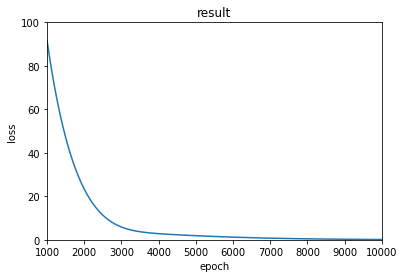

In [31]:
n_epochs = 10000
plt.title('result');
x = range(n_epochs)
y = loss_train_data
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xlim(1000,10000) # X축 범위
plt.ylim(0,100) # y축 범위
plt.plot(x,y)
plt.show()